## Problem Beskrivelse

I dette projekt er vores mål at **udvikle en maskinlæringsmodel**, der kan forudsige huspriser baseret på forskellige karakteristika som områdets gennemsnitsindkomst, husets alder, antallet af værelser, og befolkningstætheden. Dette er vigtigt for ejendomsmæglere, købere, sælgere og investorer, da det giver dem mulighed for at træffe **velinformerede beslutninger** baseret på ejendomsvurderinger og investeringer. Ved at opnå en model med lav forudsigelsesfejl, kan vi forbedre tilliden til dens anvendelse i reelle vurderinger af husværdier, hvilket gør dette til et spørgsmål af både **praktisk og akademisk betydning**.

## Datasæt Kilde og Detaljer

Datasættet, som vi bruger i dette projekt, er hentet fra Kaggle og kan findes under følgende link: [Kaggle: House Price Prediction Dataset](https://www.kaggle.com/datasets/marjuk/house-price-prediction-dataset-csv/data). Datasættet indeholder en række **vigtige træk**, der er relevante for boligmarkedet. Disse omfatter gennemsnitsindkomsten i området, husets alder, antallet af værelser, befolkningstætheden og mange andre faktorer. Disse træk bruges som input til at **træne vores maskinlæringsmodel**, med det mål at forudsige huspriser med høj nøjagtighed. Forståelse af disse data og deres indflydelse på huspriser er **afgørende** for udviklingen af en effektiv og pålidelig model.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load dataset
data = pd.read_csv('house_price_prediction.csv')

In [3]:
# Exclude the 'address' column
data = data.drop(['address'], axis=1)


In [4]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [5]:
# Feature Engineering
data['rooms_per_house'] = data['avg_area_num_rooms'] / data['avg_bedrooms']

In [6]:
# Outlier Detection and Removal
# For simplicity, using Z-score here. Any value over 3 or below -3 is considered an outlier.
from scipy import stats
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [7]:
# Data Normalization
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [8]:
# Calculate and print statistical measures for the 'price' column
mean_price = data['price'].mean()
std_price = data['price'].std()
min_price = data['price'].min()
max_price = data['price'].max()

In [9]:
# Define features and target variable
X = data.drop('price', axis=1)
y = data['price']

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize and train a more complex model: Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Predict and evaluate
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [13]:
print(f"Gennemsnitlig pris (mean): {y.mean():,.2f}")
print(f"Standardafvigelse (std): {y.std():,.2f}")
print(f"Minimum pris (min): {y.min():,.2f}")
print(f"Maksimum pris (max): {y.max():,.2f}")
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Gennemsnitlig pris (mean): 1,231,129.24
Standardafvigelse (std): 346,031.48
Minimum pris (min): 201,898.09
Maksimum pris (max): 2,275,455.31
Mean Absolute Error: 88420.02367353729
Root Mean Squared Error: 113556.72784567559


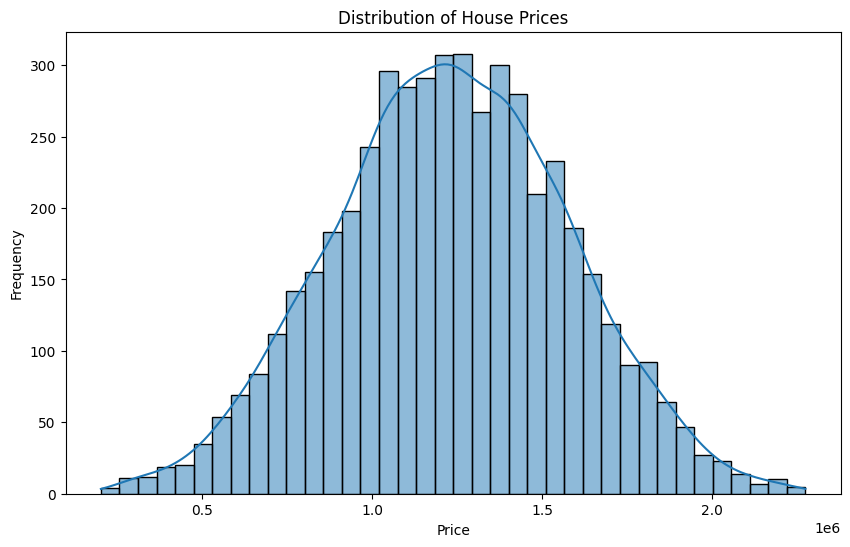

KeyError: 'avg_area_number_of_rooms'

<Figure size 1000x600 with 0 Axes>

In [14]:

# Histogram for house prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for price vs. area
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['avg_area_number_of_rooms'], y=data['price'])
plt.title('House Price vs. Average Area Number of Rooms')
plt.xlabel('Average Area Number of Rooms')
plt.ylabel('Price')
plt.show()

# Box plot for price by age of house
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['age_of_house'], y=data['price'])
plt.title('House Price by Age of House')
plt.xlabel('Age of House')
plt.ylabel('Price')
plt.show()


### Statistik Over Huspriser

**Gennemsnitlig pris (mean): 1.231.129,24**  
Dette repræsenterer den gennemsnitlige pris for et hus i datasættet.

**Standardafvigelse (std): 346.031,48**  
Dette tal indikerer spredningen af huspriserne omkring den gennemsnitlige værdi, hvilket reflekterer variationen i priserne.

**Minimum pris (min): 201.898,09**  
Dette er den laveste pris for et hus i datasættet.

**Maksimum pris (max): 2.275.455,31**  
Dette er den højeste pris for et hus i datasættet.

In [ ]:

from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['mse', 'mae']
}

CV_rfr = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
CV_rfr.fit(X_train, y_train)
print("Best Parameters:", CV_rfr.best_params_)


### Model Evaluering

**Gennemsnitlig Absolut Fejl (Mean Absolute Error, MAE): 88.420,02**  
Dette tal indikerer, hvor meget modellens forudsigelser i gennemsnit afviger fra de faktiske huspriser. I gennemsnit er hver prisforudsigelse fra modellen omkring 88.420,02 enheder væk fra den faktiske pris.

**Rodmiddelkvadratfejl (Root Mean Squared Error, RMSE): 113.556,73** 
Dette tal giver et mål for størrelsen af fejlene i modellens forudsigelser. RMSE giver mere vægt til større fejl, så store afvigelser i forudsigelserne vil øge RMSE betydeligt. En RMSE på 113.556,73 indikerer, at fejlene i modellens forudsigelser i gennemsnit ligger i denne størrelsesorden.


In [ ]:

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# R² score
r2 = r2_score(y_test, predictions)
print("R² (Coefficient of Determination):", r2)

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated scores:", cv_scores)



## Mere Dybdegående Dataanalyse

For at forstå vores datasæt bedre og forbedre kvaliteten af vores forudsigelser, vil vi udføre en **eksplorativ dataanalyse (EDA)**. Denne analyse vil inkludere visualiseringer for at undersøge fordelingen af data og relationerne mellem forskellige træk. Visualiseringerne kan omfatte histogrammer, scatter plots og boxplots for at identificere mønstre, tendenser og eventuelle anomalier i dataene.

Endvidere vil vi udføre **mere detaljeret feature engineering** for at identificere og konstruere de mest relevante træk, der kan forbedre vores models præcision. Dette kan inkludere oprettelse af nye træk ud fra eksisterende data eller transformation af træk for bedre at afspejle deres relation til huspriserne.

## Model Træning

Vi vil eksperimentere med forskellige modeller for at sammenligne deres præstationer. Udover vores nuværende Random Forest Regressor, kan vi overveje at anvende en **Deep Neural Network** eller en anden regressionsmodel. Dette vil give os en bedre forståelse af, hvilken modeltype der er mest effektiv til vores specifikke datasæt.

Desuden vil vi udføre **hyperparameter tuning** for at optimere ydeevnen af vores modeller. Dette kan omfatte justering af parametre som antal træer i en Random Forest-model eller lagparametre i en dyb neuralt netværk.

## Udvidet Model Evaluering

For at få en mere omfattende vurdering af vores models præstationer vil vi inkludere yderligere metrikker som **R² (bestemmelseskoefficient)**, der beskriver, hvor meget af variansen i huspriserne der forklares af modellen. En høj R²-værdi indikerer, at modellen forklarer en stor del af variansen i dataene.

Derudover vil vi anvende **krydsvalidering** for at sikre, at vores model præsterer konsekvent på tværs af forskellige datasæt. Dette vil hjælpe os med at vurdere modellens robusthed og pålidelighed i forskellige scenarier.